<span style='color:gray'> <span style="font-size:25px;"> **Development of "Machine Learning Models"  (Workflow)**
    
In this Notebook, the machine learning model will be created and then the data from well-logs DLIS file [after preprocessing, sorting and finalizing the data] is loaded as input for Machine Learning model (ML); 
* Random Forest Regressor
* Gradient Boosting Regressor
    
    
For the prediction of petrophysical properties, such as porosity, permeability and water saturation, these two Regressor models **Random Forest Regressor** and **Gradient Boosting Regressor** are suitable.

They are Ensemble Based Tree Methods; they are based on the generation of Decision Trees.

We use Regression Models since we want to predict a continuous variable.

**Advantages** of the 2 regression models, since they are based on Decision Trees:

* They do not need the normalization or scaling of the original dataset;
* They are not sensitive to outliers, thus, outliers detection and removal are not required.

**==================================================================================================================**
    
In well-log machine learning models, the choice between regression and classification (Supervised ML) depends on the nature of the problem you are trying to solve and the type of data you have. Let's break down the reasons why regression is often preferred over classification in this context:

**Continuous Output**: Well-log data often involves continuous measurements such as porosity, permeability, resistivity, and other geological properties. Regression is well-suited for predicting and modeling continuous numerical values. Classification, on the other hand, is typically used when the output is categorical or discrete, like classifying lithology or rock types.

**Data Distribution**: Well-log data tends to have a wide range of continuous values. Using classification would require discretizing this data into bins or classes, which can lead to loss of information and potentially introduce biases. Regression models can capture the nuances and variations present in the continuous data more effectively.

**Evaluation Metrics**: Regression models are evaluated using metrics such as mean squared error (MSE), root mean squared error (RMSE), or mean absolute error (MAE). These metrics are well-suited for measuring the accuracy of predictions involving continuous values. Classification models, on the other hand, use metrics like accuracy, precision, recall, and F1-score, which are designed for categorical predictions.

**Feature Importance**: Well-log data analysis often involves understanding the relationships between different geological features and the target property. Regression models can provide insights into the quantitative impact of each feature on the predicted values, aiding in geological interpretation.


<span style='color:gray'> <span style="font-size:20px;"> 
**Importing Libraries, Regressors, and Required Dependencies**

In [1]:
%pip install --quiet --upgrade scikit-learn==1.2.2
%pip install --quiet qbstyles


# Importing the dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from qbstyles import mpl_style
mpl_style(dark=False)  # Set light matplotlib style

import matplotlib.patches as mpatches  # To create a legend with a color box
import pickle

# Importing the models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
                                         
from sklearn.model_selection import RandomizedSearchCV

# train_test_split is a function 
# cross_val_score and KFold are functions

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 

# Regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error

# The package "Matplotlib Inline Back-end" provides support for Matplotlib to display figures directly inline
# "svg" stands for "scalable vector graphic". The plot can be scaled without compromising its quality
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<span style='color:gray'> <span style="font-size:20px;"> 
**Loading datafile that has been extracted from DLIS or LAS file after (Sorting, Cleaning, preprocessing, choosing the logs based on need logically ...)**

Load the **csv** well log data to Pandas DataFrame 

In [2]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_Fin.csv'
df = pd.read_csv(file_path)
df

DEPTH         GR       AT10       AT30       AT90      RHOZ  \
0      5230.899893  18.364668  19.196234  20.528210  22.001585  2.112285   
1      5230.999893  18.145609  17.247047  17.625770  18.691048  2.125317   
2      5231.099893  17.943176  15.329754  15.300582  16.073359  2.130714   
3      5231.199893  18.042002  11.579553  11.556740  11.997000  2.124417   
4      5231.299893  18.240273  10.135851  10.116982  10.471834  2.124772   
...            ...        ...        ...        ...        ...       ...   
10030  6008.218000  38.224780  42.018140  22.247396  10.556654  2.211345   
10031  6008.370000  38.224780  42.056410  22.243960  10.582869  2.211345   
10032  6008.522500  38.224780  42.117004  22.251312  10.609693  2.211345   
10033  6008.675000  38.224780  42.145510  22.271675  10.631273  2.211345   
10034  6008.827000  38.224780  42.154550  22.288443  10.644648  2.211345   

            NPHI       DTCO      PEFZ      NMRFF     NMREFF     NMRTOT  
0      27.765093  68.337450  8.430419  14.694100  20.619087  27.914236  
1      28.151360  67.993440  8.418438  14.293544  20.741860  26.978453  
2      29.748737  67.663246  8.383753  13.796300  21.070040  26.331642  
3      31.248146  67.298560  8.239479  13.157555  21.527140  25.708328  
4      30.671698  66.678116  8.161089  12.434903  22.058117  25.103062  
...          ...        ...       ...        ...        ...        ...  
10030   0.090613  59.398567  9.907986   0.056437   0.067626   0.067654  
10031   0.090613  59.398567  9.907986   0.056437   0.067626   0.067654  
10032   0.090613  59.398567  9.907986   0.056437   0.067626   0.067654  
10033   0.090613  59.398567  9.907986   0.056437   0.067626   0.067654  
10034   0.090613  59.398567  9.907986   0.056437   0.067626   0.067654  

[10035 rows x 12 columns]

======

<span style='color:gray'> <span style="font-size:20px;"> 
**Defining Predictor (X) and what will be predicted**

In [3]:
predictors = ["GR", "AT90", "RHOZ", "NPHI", "DTCO", "PEFZ"]  
outputs = ["NMREFF","NMRFF","NMRTOT"]  # They are predicted at the same time 

X = df[predictors]
y = df[outputs]

<span style='color:gray'> <span style="font-size:20px;"> 
    
**Training & Test Well Log Datasets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* **Data Splitting Function**: We utilize the "train_test_split" function to perform the splitting of our data.


* **Variables to Split**: The data we're working with consists of two main variables, denoted as X and y. These are the entities that we want to partition.


* **Training Set Size**: Instead of specifying an exact training set size, we have the option to leave it as "None." In this case, the function will automatically determine the training size based on the complement of the test size. The test size is set at 20%, meaning 80% will be allocated to the training set.


* **Test Set Size**: We assign a test size of 20%, indicating that one-fifth of the entire dataset will be allocated for testing the model's performance.


* **Shuffling Data**: The default behavior is to shuffle the data prior to splitting. This randomization helps in creating a balanced distribution between the training and test sets.


* **Reproducibility with Random Seed**: For the sake of reproducibility across multiple runs of the function, we introduce an integer value known as the "random state." Here, we've chosen the value 42. It's essential to set this only when shuffling is enabled.


*In essence, we're utilizing the "train_test_split" function to divide our data into training and test portions. We provide our data variables X and y, and the function handles the allocation. The training size is determined as the complementary value to the test size, which is set at 20%. Shuffling the data ensures randomness, and to achieve consistent outcomes in different runs, we use a random state value of 42, applying it only when shuffling is activated.*

In [7]:
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10035, 6) (10035, 3) (8028, 6) (2007, 6) (8028, 3) (2007, 3)


<span style='color:gray'> <span style="font-size:20px;"> 
**Cross-Validation: Enhancing Model Evaluation**

Cross-validation is a technique used to evaluate the performance of a machine learning model. It works by dividing the training dataset into k subsets, called folds. The model is then trained on k-1 folds of the training dataset and evaluated on the remaining fold. This procedure is repeated k times, with each fold being used as the validation set once. The average accuracy of the model across all k folds is then used as an estimate of the model's overall performance.

It is proposed to use k-fold cross-validation to evaluate the performance of two models on the training dataset. This will help them to choose the model that is most likely to generalize well to unseen data.

The k-fold cross-validation step can be skipped, since it will be carried out again during the optimization process. However, it is still a good idea to perform k-fold cross-validation on the training dataset before starting the optimization process, as this will help to ensure that the optimization process is not converging to a local optimum.

Here are some additional details about k-fold cross-validation:

The value of k is typically chosen to be between 5 and 10.
The folds should be created randomly, to avoid any bias in the results.
The model should be trained and evaluated on the same set of features for each fold.
The accuracy of the model is typically measured using a metric such as the coefficient of determination.
K-fold cross-validation is a powerful technique for evaluating the performance of machine learning models. It is more reliable than simply training and evaluating the model on a single holdout dataset, as it helps to mitigate the effects of overfitting.

<span style='color:gray'> <span style="font-size:20px;"> 
**Creating Models + Cross-Validation [evaluation the performance of a machine learning model]**

Creating Models such as **Random Forest** & **Gradient Boosting** Models

using **for loop** to iterate over different models and compare them together

In [8]:
rf_model = RandomForestRegressor(random_state=42)  # Random Forest Model 
gb_model = GradientBoostingRegressor(random_state=42)  # Gradient Boosting Model 

models = [rf_model, gb_model]

kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Number of folds 

def compare_models_cv():  
    for model in models:
        multi_output_model = MultiOutputRegressor(model)
        r2_score = cross_val_score(multi_output_model, X_train, y_train, cv=kf, scoring='r2')
        r2_score = np.round(r2_score,4)
        mean_r2 = sum(r2_score)/len(r2_score)
        mean_r2 = mean_r2*100
        mean_r2 = round(mean_r2,2)

        print('Coefficient of Determination for', model, '=', r2_score)
        print('Average % Coefficient of Determination for', model, '=', mean_r2)
        print('============================================')
        
compare_models_cv() 

Coefficient of Determination for RandomForestRegressor(random_state=42) = [0.8727 0.8462 0.8934 0.8601 0.8813 0.8445 0.8837 0.852  0.8742 0.8875]
Average % Coefficient of Determination for RandomForestRegressor(random_state=42) = 86.96
Coefficient of Determination for GradientBoostingRegressor(random_state=42) = [0.7964 0.768  0.7969 0.7899 0.788  0.7715 0.799  0.7892 0.8044 0.8024]
Average % Coefficient of Determination for GradientBoostingRegressor(random_state=42) = 79.06


<span style='color:gray'> <span style="font-size:20px;"> 
**Hyperparameter Tuning (Randomized Search CV) - Optimization Problem**

We re-consider the training dataset and use the Randomized Search Cross Validation technique to determine **the optimal hyperparameter values** for <span style='color:blue'> <span style="font-size:15px;"> the Random Forest</span> </span>
and
<span style='color:blue'> <span style="font-size:15px;"> Gradient Boosting models </span> </span>.

*To start, we define a grid of hyperparameters that will be randomly sampled when calling the RandomizedSearchCV() function. The models are then cross-validated on these random combinations of hyperparameters.*

**The parameters of the RandomizedSearchCV() function are:**

* The model without any hyperparameters
* The grid of hyperparameters
* The number of combinations to be randomly sampled (n_iter=20)
* The number of k-folds into which the training dataset is split (cv=10)
* The technique returns the optimal combination of hyperparameters for the two models.

**Here is a more detailed explanation of each parameter:**

* **Model**: The model without any hyperparameters is the base model that we will use to start the search. In this case, we are using the Random Forest and Gradient Boosting models.
* **Grid of hyperparameters**: The grid of hyperparameters defines the range of values that we will randomly sample from. This allows us to explore a wider range of hyperparameter values than if we were to simply grid search over a fixed set of values.
* **Number of combinations to be randomly sampled (n_iter=20)**: The n_iter parameter specifies the number of random combinations of hyperparameters to be sampled. In this case, we are sampling 20 combinations.
* **Number of k-folds into which the training dataset is split (cv=10)**: The cv parameter specifies the number of k-folds to use for cross-validation. In this case, we are using 10 folds.
* The RandomizedSearchCV() function will randomly sample 20 combinations of hyperparameters from the grid and cross-validate each combination on 10 folds of the training dataset. The function will then return the combination of hyperparameters that resulted in the best cross-validation score.

This technique allows us to quickly and efficiently explore a wide range of hyperparameter values to find the optimal combination for our models.

<span style='color:red'> <span style="font-size:15px;"> 
**Random Forest Model**

We consider the following **hyperparameters**:

* n_estimators = number of trees in the forest; **(Number of trees to be used)**
* max_depth = the maximum depth of the tree; **(Maximum number of levels in tree)**
* criterion = the function that measures the quality of the split; **(Criterion to split on)**

<span style='color:blue'> <span style="font-size:15px;"> **then Grid Creation**:</span> </span>  grid of Hyperparameters 

In [9]:
rf_n_estimators = [100, 150, 200, 250, 300, 350, 400]
rf_max_depth = [5, 10, 15, 20, 25]
rf_criterion = ['squared_error']                         # "squared_error" is by default. It is optional

rf_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'criterion': rf_criterion}

In the line below:

the RandomizedSearchCV class in scikit-learn is used **to tune the hyperparameters of a RandomForestRegressor model**.

* The first line of code creates a **RandomForestRegressor model** with a random state of 42. This ensures that the results of the model are reproducible.


* The second line of code creates a **RandomizedSearchCV object**. This object will be used to search for the best hyperparameters for the RandomForestRegressor model.


<span style='color:blue'> <span style="font-size:15px;">**rf_model**</span> </span>:
The model to be tuned. In this case, it is a RandomForestRegressor model.

<span style='color:blue'> <span style="font-size:15px;">**rf_grid**</span> </span>: 
A dictionary of hyperparameters to search. The keys of the dictionary are the hyperparameter names, and the values are the possible values to search for. In this case, the dictionary is searching for the best values of the n_estimators and max_depth hyperparameters.

<span style='color:blue'> <span style="font-size:15px;">**n_iter**</span> </span>:
The number of hyperparameter combinations to try. In this case, the RandomizedSearchCV object will try 20 different combinations of hyperparameters.

<span style='color:blue'> <span style="font-size:15px;">**cv**</span> </span>:
The number of folds to use for cross-validation. In this case, the RandomizedSearchCV object will use 10 folds for cross-validation.

<span style='color:blue'> <span style="font-size:15px;">**random_state**</span> </span>:
The random state to use for the search. In this case, the random state is set to 42.

In [10]:
rf_model = RandomForestRegressor(random_state=42)        # Shuffle=True by default

rf_random = RandomizedSearchCV(rf_model, rf_grid, n_iter=20, cv=10, random_state=42)

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42)

In [11]:
rf_random.cv_results_

{'mean_fit_time': array([11.18790982,  7.79387741,  8.06750226,  3.32929041,  4.23495655,
         4.96257377, 10.06569293,  7.24452131,  3.09354265,  5.54832981,
         4.19014792, 11.64627151,  1.15704131,  3.56820822,  6.83530512,
        12.74432244,  4.3070509 ,  6.08983598,  1.69344184,  2.239219  ]),
 'std_fit_time': array([0.33437024, 0.20850562, 0.12612369, 0.23016785, 0.11784467,
        0.17428148, 0.91901845, 0.35984718, 0.09336185, 0.16713757,
        0.26624957, 0.30653202, 0.08634173, 0.15203638, 0.14497203,
        0.43503082, 0.20067792, 0.24868075, 0.11251644, 0.08782848]),
 'mean_score_time': array([0.08344309, 0.04591124, 0.05934489, 0.02419243, 0.02760451,
        0.03892193, 0.063606  , 0.04276149, 0.02015128, 0.03528156,
        0.02650526, 0.09085093, 0.01020579, 0.02611415, 0.04604566,
        0.10046239, 0.03392541, 0.03650398, 0.01340082, 0.01698797]),
 'std_score_time': array([0.00235379, 0.00179671, 0.00238022, 0.00109507, 0.00260307,
        0.00148641, 

<span style='color:blue'> <span style="font-size:15px;"> **Print the best hyperparameters**:</span> </span>

Combination that gives **the highest accuracy (coefficient of determination) during the cross-validation**

In [12]:
best_parameters = rf_random.best_params_
print(best_parameters)

{'n_estimators': 350, 'max_depth': 25, 'criterion': 'squared_error'}


Print the accuracy we get for the 
<span style='color:green'> <span style="font-size:15px;"> **best combination**:</span> </span>

In [13]:
highest_accuracy = rf_random.best_score_ 
highest_accuracy = round(highest_accuracy,4)
highest_accuracy = highest_accuracy*100
print('Coefficient of Determination for the Random Forest =', highest_accuracy)

Coefficient of Determination for the Random Forest = 86.59


## Finalized RF Model

Create the tuned Random Forest

In [14]:
rf_final_model = RandomForestRegressor(
    n_estimators=best_parameters['n_estimators'],
    max_depth=best_parameters['max_depth'],
    random_state=42,
    criterion=best_parameters['criterion']
)

======================================================================================================================

<span style='color:red'> <span style="font-size:15px;"> 
**Gradient Boosting Model**

We consider the following **hyperparameters**:

* n_estimators = number of trees in the forest; **(Number of trees to be used)**
* max_depth = the maximum depth of the tree; **(Maximum number of levels in tree)**
* criterion = the function that measures the quality of the split; **(Criterion to split on)**
* Learning rate 


<span style='color:blue'> <span style="font-size:15px;"> **then Grid Creation**:</span> </span>  grid of Hyperparameters 

GRADIENT BOOSTING Hyperparameters

In [15]:
gb_n_estimators = [100, 150, 200, 250, 300, 350, 400]
gb_max_depth = [5, 10, 15, 20, 25]
gb_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
gb_criterion = ['squared_error']                       # It is optional 

gb_grid = {
    'estimator__n_estimators': gb_n_estimators,
    'estimator__max_depth': gb_max_depth,
    'estimator__learning_rate': gb_rate,
    'estimator__criterion': gb_criterion
}

# Create the base GradientBoostingRegressor model
gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

# Create the random search Gradient Boosting
gb_random = RandomizedSearchCV(gb_model, gb_grid, n_iter=20, cv=10, random_state=42)

# Fit the model
gb_random.fit(X_train, y_train)  # Assuming you have defined X_train and y_train


RandomizedSearchCV(cv=10,
                   estimator=MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42)),
                   n_iter=20,
                   param_distributions={'estimator__criterion': ['squared_error'],
                                        'estimator__learning_rate': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6],
                                        'estimator__max_depth': [5, 10, 15, 20,
                                                                 25],
                                        'estimator__n_estimators': [100, 150,
                                                                    200, 250,
                                                                    300, 350,
                                                                    400]},
                   random_state=42)

In the line below:

the RandomizedSearchCV class in scikit-learn is used **to tune the hyperparameters of a RandomForestRegressor model**.

* The first line of code creates a **RandomForestRegressor model** with a random state of 42. This ensures that the results of the model are reproducible.


* The second line of code creates a **RandomizedSearchCV object**. This object will be used to search for the best hyperparameters for the RandomForestRegressor model.

In [16]:
gb_random.cv_results_

{'mean_fit_time': array([27.84703679,  4.7871949 , 14.40823505, 11.60490165, 49.09710255,
        22.06863971, 25.84580333, 10.18894961, 20.76399138, 10.47811143,
         6.41117902, 36.68530443,  4.1023653 , 17.66935282, 20.23087893,
        12.80419691, 14.76405694, 42.86986938,  4.97352049, 29.06546464]),
 'std_fit_time': array([1.15469308, 0.40330802, 0.54523351, 0.56421731, 3.45911491,
        0.49958382, 0.50938547, 0.45055207, 0.74785288, 0.55024228,
        0.55013158, 1.13620019, 0.31135944, 0.54027251, 0.71042963,
        0.62974875, 0.59176309, 0.62304099, 0.38035092, 1.51552407]),
 'mean_score_time': array([0.1054704 , 0.01916683, 0.02179379, 0.02320869, 0.07414684,
        0.02726448, 0.02443693, 0.01231411, 0.02442994, 0.01995838,
        0.02513394, 0.03354945, 0.01772316, 0.03180625, 0.03779004,
        0.0125077 , 0.02889917, 0.06017392, 0.0196857 , 0.04792762]),
 'std_score_time': array([0.00341502, 0.00065845, 0.00177427, 0.00100966, 0.00307934,
        0.00220007, 

<span style='color:blue'> <span style="font-size:15px;"> **Print the best hyperparameters**:</span> </span>

Combination that gives **the highest accuracy (coefficient of determination) during the cross-validation**

In [17]:
best_parameters = gb_random.best_params_
print(best_parameters)  

{'estimator__n_estimators': 200, 'estimator__max_depth': 10, 'estimator__learning_rate': 0.1, 'estimator__criterion': 'squared_error'}


Print the accuracy we get for the 
<span style='color:green'> <span style="font-size:15px;"> **best combination**:</span> </span>

In [18]:
highest_accuracy = gb_random.best_score_
highest_accuracy = round(highest_accuracy,3)
highest_accuracy = highest_accuracy*100
print('Coefficient of Determination for the Gradient Boosting =', highest_accuracy)

Coefficient of Determination for the Gradient Boosting = 86.0


## Finalized GB Model

Create the tuned Gradient Boosting 

In [19]:
gb_final_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators = best_parameters['estimator__n_estimators'],
                                                                max_depth = best_parameters['estimator__max_depth'],
                                                                learning_rate = best_parameters['estimator__learning_rate'],
                                                                random_state=42,
                                                                criterion = best_parameters['estimator__criterion']
))

# ==============================================================

<span style='color:gray'> <span style="font-size:20px;">**Evaluation of the Tuned Models and Visualization of Results**</span> </span>

We consider the Test Dataset or, also called, the Hold-Out Dataset (20% of the Original Dataset) and we perform the prediction on this Dataset which is the "unseen" Dataset.


In [20]:
# Train the tuned Random Forest 
rf_final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=350, random_state=42)

In [21]:
# Train the tuned Gradient Boosting 
gb_final_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(criterion='squared_error',
                                                         max_depth=10,
                                                         n_estimators=200,
                                                         random_state=42))

=============

In [22]:
y_pred_rf = rf_final_model.predict(X_test)     # Prediction on Test data (RF)
y_pred_gb = gb_final_model.predict(X_test)     # Prediction on Test data (GB

Predicted Data

In [23]:
# Extract the predicted values for output 1, output 2 and output 3
y_pred_rf_EFF = y_pred_rf[:, 0]
y_pred_rf_FF = y_pred_rf[:, 1]
y_pred_rf_TOT = y_pred_rf[:, 2]

In [24]:
# Extract the predicted values for output 1, output 2 and output 3
y_pred_gb_EFF = y_pred_gb[:, 0]
y_pred_gb_FF = y_pred_gb[:, 1]
y_pred_gb_TOT = y_pred_gb[:, 2]

Measured NMR (Log Data)

In [25]:
# Measurement Values of Y (NMR ==> EFECTIVE, Free Fluid, TCMR)
y_test_EFF = y_test.drop(columns=["NMRFF","NMRTOT"])      # CMRP_3MS [EFECTIVE Porosity]
y_test_FF = y_test.drop(columns=["NMREFF","NMRTOT"])   # CMFF [Free Fluid Porosity]
y_test_TOT = y_test.drop(columns=["NMREFF","NMRFF"])  # TCMR [Total Porosity]

y_test_EFF, y_pred_rf_EFF

y_test_FF, y_pred_rf_FF

y_test_TOT, y_pred_rf_TOT

=====

y_test_EFF, y_pred_gb_EFF

y_test_FF, y_pred_gb_FF

y_test_TOT, y_pred_gb_TOT

<span style='color:gray'> <span style="font-size:30px;">**PLOTS**</span> </span>

<span style='color:gray'> <span style="font-size:20px;">**Random Forest - Scatter Plot**</span> </span>

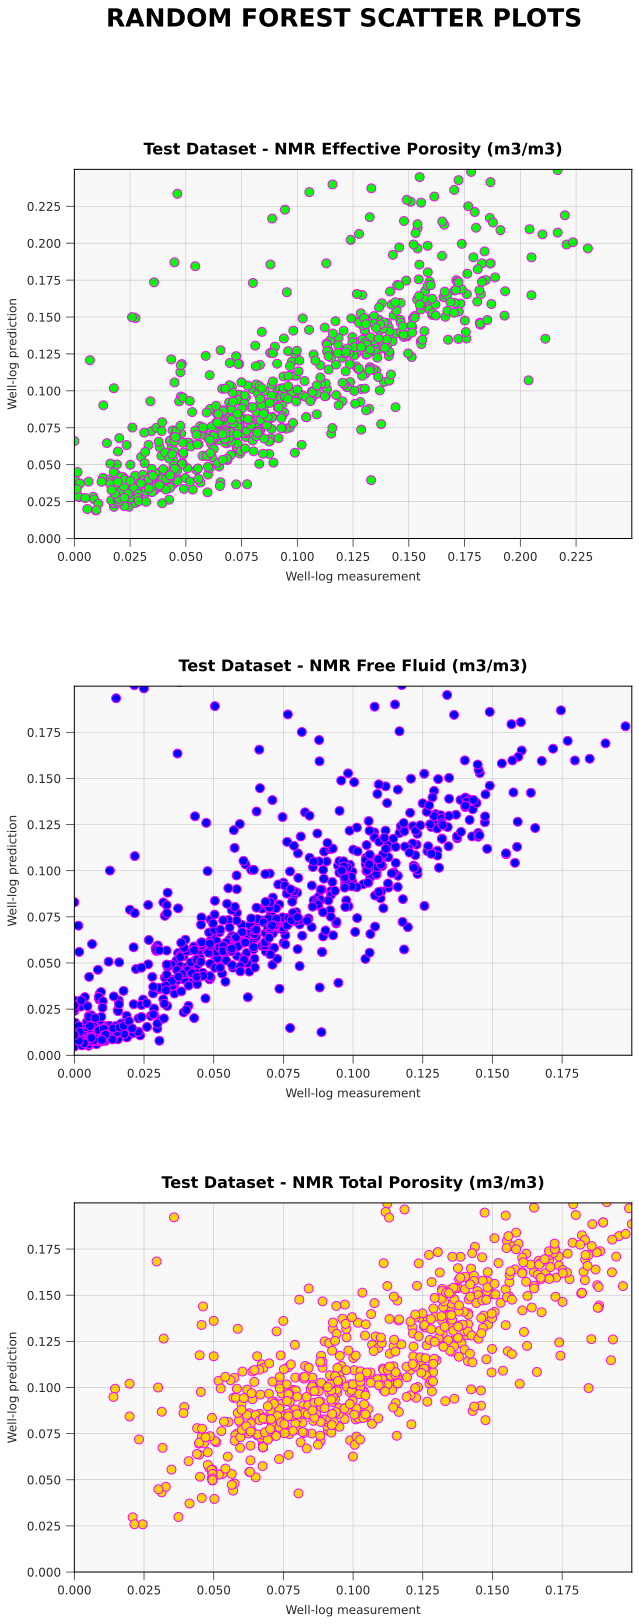

In [26]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(3,1, figsize=(10,25))
fig.suptitle("RANDOM FOREST SCATTER PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1) 
ax2 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1) 
ax3 = plt.subplot2grid((3,1),(2,0),rowspan=1,colspan=1) 


# First Scatter Plot
ax1.scatter(y_test_EFF,y_pred_rf_EFF, s=80, c='lime', edgecolors='magenta')
ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Test Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
ax1.set_xlim(0,0.25)
ax1.set_ylim(0,0.25)
ax1.set_xticks(np.arange(0, 0.25, 0.025))
ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Second Scatter Plot
ax2.scatter(y_test_FF,y_pred_rf_FF, s=80, c='blue', edgecolors='magenta')
ax2.set_xlabel('Well-log measurement', fontsize=12) 
ax2.set_ylabel('Well-log prediction', fontsize=12)
ax2.set_title('Test Dataset - NMR Free Fluid (m3/m3)', fontsize=16, fontweight='bold')
ax2.set_xlim(0,0.200)
ax2.set_ylim(0,0.200)
ax2.set_xticks(np.arange(0, 0.200, 0.025))
ax2.set_yticks(np.arange(0, 0.200, 0.025))

# Third Scatter Plot 
ax3.scatter(y_test_TOT,y_pred_rf_TOT, s=80, c='gold', edgecolors='magenta')
ax3.set_xlabel('Well-log measurement', fontsize=12) 
ax3.set_ylabel('Well-log prediction', fontsize=12)
ax3.set_title('Test Dataset - NMR Total Porosity (m3/m3)', fontsize=16, fontweight='bold')
ax3.set_xlim(0,0.200)
ax3.set_ylim(0,0.200)
ax3.set_xticks(np.arange(0, 0.200, 0.025))
ax3.set_yticks(np.arange(0, 0.200, 0.025))


# Add a black border to each subplot
for ax in [ax1,ax2,ax3]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1,ax2,ax3]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1,ax2,ax3]:
    ax.grid(color='black',lw=0.5)

<span style='color:gray'> <span style="font-size:20px;">**Random Forest - Well-log Plot**</span> </span>

In [27]:
# Otput 1, Output 2 and Output 3 should be converted into arrays 
y_test_EFF = np.array(y_test_EFF)
y_test_FF = np.array(y_test_FF)
y_test_TOT = np.array(y_test_TOT)

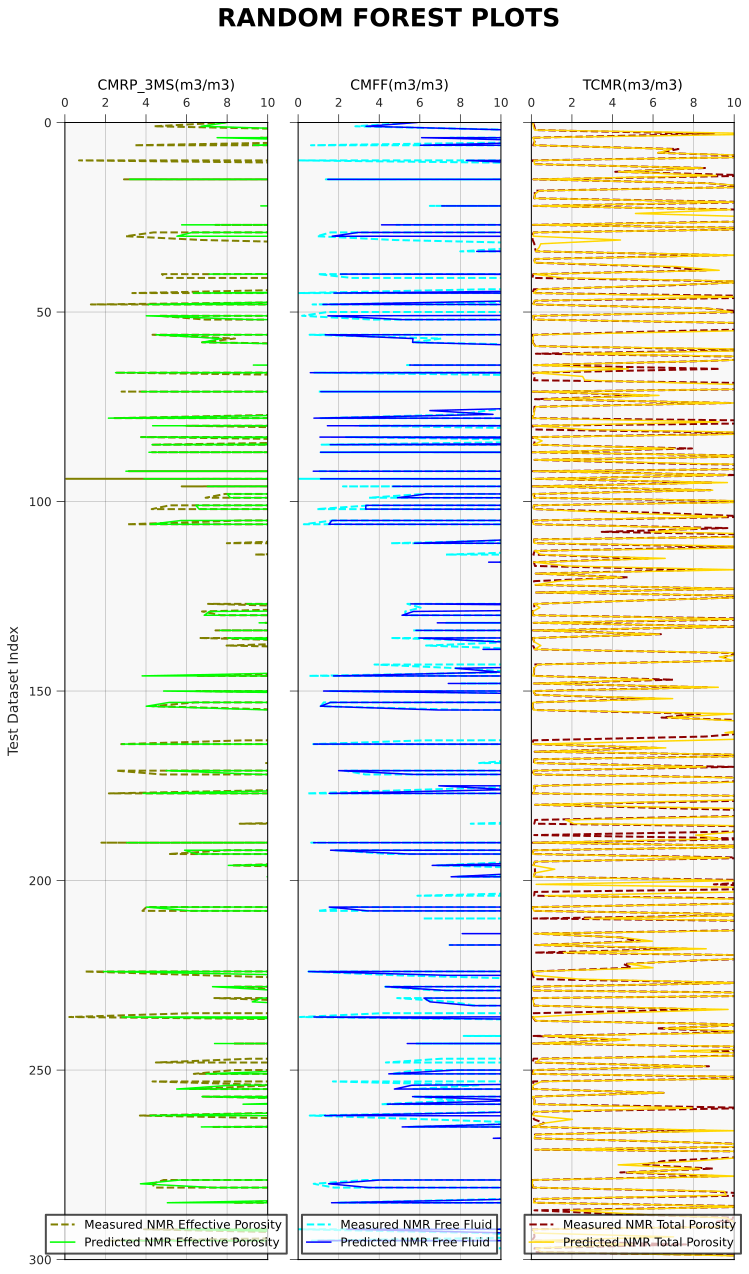

In [28]:
# Another way to perform comparison between the well log measurements and the predicted values 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,20))
fig.suptitle("RANDOM FOREST PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.15)

#Set up the subplots grid
ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1) 
ax2 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1) 
ax3 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1) 

x_ax = range(len(X_test))


# First Plot
ax1.plot(y_test_EFF*100, x_ax, color = "olive", lw = 2, linestyle = '--')
ax1.plot(y_pred_rf_EFF*100, x_ax, color = "lime", lw = 1.5, linestyle = '-')  
ax1.set_xlabel('CMRP_3MS(m3/m3)',fontsize=14, color='black') 
ax1.set_ylabel('Test Dataset Index',fontsize=14)
legend1 = ax1.legend(["Measured NMR Effective Porosity", "Predicted NMR Effective Porosity"], loc= 'lower center',fontsize='large', framealpha=0.7)


# Second Plot
ax2.plot(y_test_FF*100, x_ax, color = "aqua", lw = 2, linestyle = '--')
ax2.plot(y_pred_rf_FF*100, x_ax, color = "blue", lw = 1.5, linestyle = '-')
ax2.set_xlabel('CMFF(m3/m3)',fontsize=14, color='black')
legend2 = ax2.legend(["Measured NMR Free Fluid", "Predicted NMR Free Fluid"], loc= 'lower center',fontsize='large', framealpha=0.7)


# Third Plot 
ax3.plot(y_test_TOT, x_ax, color = "darkred", lw = 2, linestyle = '--')
ax3.plot(y_pred_rf_TOT, x_ax, color = "gold", lw = 1.5, linestyle = '-')
ax3.set_xlabel('TCMR(m3/m3)',fontsize=14, color='black')
legend3 = ax3.legend(["Measured NMR Total Porosity", "Predicted NMR Total Porosity"], loc= 'lower center',fontsize='large', framealpha=0.7)


# Set xlim() and ylim()
for ax in [ax1,ax2,ax3]:
    ax.set_xlim(0,10)
    ax.set_ylim(300,0) 
    
# Add a black border to each subplot
for ax in [ax1,ax2,ax3]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1,ax2,ax3]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1,ax2,ax3]:
    ax.grid(color='black',lw=0.7)
    
# Hide tick labels on the y-axis
for ax in [ax2,ax3]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
# Set border properties of the legend 
for legend in [legend1,legend2,legend3]:
    legend.get_frame().set_linewidth(2)
    legend.get_frame().set_edgecolor('black')
    
# Set xlabel and xticks position 
for ax in [ax1,ax2,ax3]:
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("top")

================================================================================================================

<span style='color:gray'> <span style="font-size:20px;">**Gradient Boosting - Scatter Plot**</span> </span>

<span style='color:gray'> <span style="font-size:20px;">**Gradient Boosting - Well-log Plot**</span> </span>

<span style='color:gray'> <span style="font-size:20px;">**Performance Regression/Evaluation Metrics**</span> </span>

Beside the "Accuracy score" which, in this case, is the "Coefficient of Determination (r2)", we can assess the goodness of fit of the models with the following Regression Metrics, by considering only the Test Dataset:

<span style='color:red'> <span style="font-size:15px;"> **Random Forest Model**</span> </span>

In [29]:
test_data = [y_test_EFF, y_test_FF, y_test_TOT]
predicted_data = [y_pred_rf_EFF, y_pred_rf_FF, y_pred_rf_TOT]
print('========= Random Forest =========')

def regression_metrics_rf():   # Create "for loop" that calculates the Regression Metrics for each variable, separately
    for i in range(len(test_data)):
        
        r2 = r2_score(test_data[i], predicted_data[i])
        r2 = round(r2,4)
        r2 = r2*100

        rmse = mean_squared_error(test_data[i], predicted_data[i], squared = False) # By default squared is True. If True returns MSE value, if False returns RMSE value
        rmse = round(rmse,4)
    
        mse = mean_squared_error(test_data[i], predicted_data[i], squared = True)
        mse = round(mse,4)
    
        mae = mean_absolute_error(test_data[i], predicted_data[i])
        mae = round(mae,4)
        
        print("Regression metrics for Variable", i+1)
        print("Coefficient of Determination:", r2)
        print("Root Mean Squared Error:", rmse)
        print("Mean Squared Error:", mse)
        print("Mean Absolute Error:", mae)
        print("="*37)

regression_metrics_rf()


#===

predicted_data = [y_pred_gb_EFF, y_pred_gb_FF, y_pred_gb_TOT]
print('========= Gadient Boosting ==========')

def regression_metrics_gb():   # Create "for loop" that calculates the Regression Metrics for each variable, separately
    for i in range(len(test_data)):
        
        r2 = r2_score(test_data[i], predicted_data[i])
        r2 = round(r2,4)
        r2 = r2*100

        rmse = mean_squared_error(test_data[i], predicted_data[i], squared = False) # By default squared is True. If True returns MSE value, if False returns RMSE value
        rmse = round(rmse,4)
    
        mse = mean_squared_error(test_data[i], predicted_data[i], squared = True)
        mse = round(mse,4)
    
        mae = mean_absolute_error(test_data[i], predicted_data[i])
        mae = round(mae,4)
        
        print("Regression metrics for Variable", i+1)
        print("Coefficient of Determination:", r2)
        print("Root Mean Squared Error:", rmse)
        print("Mean Squared Error:", mse)
        print("Mean Absolute Error:", mae)
        print("="*37)

regression_metrics_gb()

========= Random Forest =========
Regression metrics for Variable 1
Coefficient of Determination: 87.48
Root Mean Squared Error: 1.9566
Mean Squared Error: 3.8284
Mean Absolute Error: 0.8701
Regression metrics for Variable 2
Coefficient of Determination: 87.64999999999999
Root Mean Squared Error: 1.5771
Mean Squared Error: 2.4873
Mean Absolute Error: 0.7588
Regression metrics for Variable 3
Coefficient of Determination: 87.32
Root Mean Squared Error: 2.045
Mean Squared Error: 4.1822
Mean Absolute Error: 0.9385
========= Gadient Boosting ==========
Regression metrics for Variable 1
Coefficient of Determination: 87.01
Root Mean Squared Error: 1.9926
Mean Squared Error: 3.9706
Mean Absolute Error: 0.8891
Regression metrics for Variable 2
Coefficient of Determination: 85.72999999999999
Root Mean Squared Error: 1.6953
Mean Squared Error: 2.8742
Mean Absolute Error: 0.7822
Regression metrics for Variable 3
Coefficient of Determination: 85.11999999999999
Root Mean Squared Error: 2.2147
Mean S

We can realize histograms of Regression/Evaluation Metrics to visualize the performance of the two models.

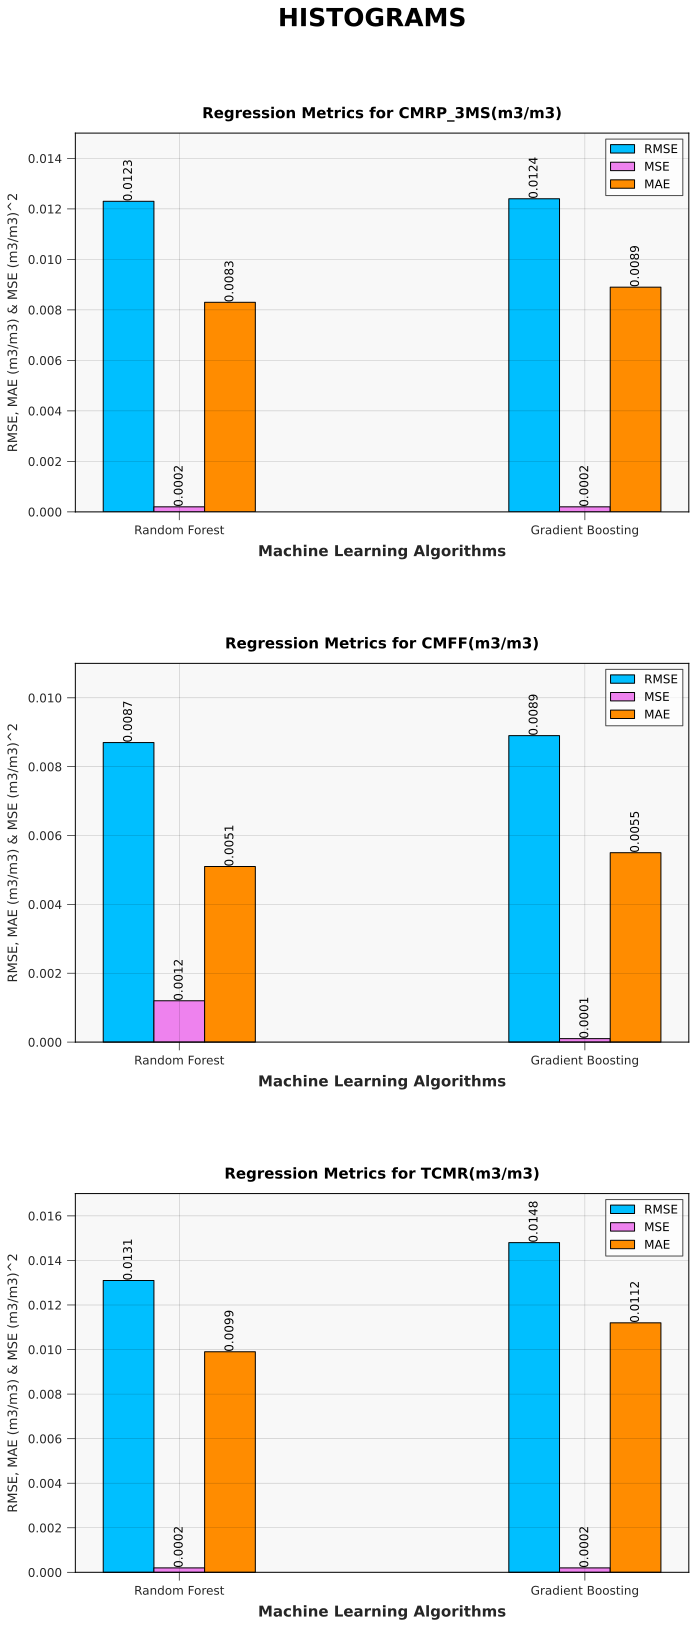

In [30]:
# Histograms 
fig, ax = plt.subplots(3,1, figsize=(11,25))
fig.suptitle("HISTOGRAMS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.91,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1) 
ax2 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1) 
ax3 = plt.subplot2grid((3,1),(2,0),rowspan=1,colspan=1) 

##############################################################################################################

# Histogram for Variable 1
models1 = ['Random Forest', 'Gradient Boosting']
metrics1 = ['RMSE','MSE','MAE']
RMSE1 = [0.0123, 0.0124]   # The unit is: [m3/m3]
MSE1 = [0.0002, 0.0002]    # The unit is: [m3/m3]^2
MAE1 = [0.0083, 0.0089]    # The unit is [m3/m3]

x1 = np.arange(len(models1))  # the label locations

ax1.bar(x1-0.125, RMSE1, width=0.125, color = 'deepskyblue', edgecolor='black')
ax1.bar(x1+0,     MSE1,  width=0.125, color = 'violet'     , edgecolor='black')
ax1.bar(x1+0.125, MAE1,  width=0.125, color = 'darkorange' , edgecolor='black')

ax1.annotate('0.0123', xy=(-0.125,0.0123), ha='center', va='bottom', rotation=90, fontsize=12)
ax1.annotate('0.0002', xy=(+0,0.0002),     ha='center', va='bottom', rotation=90, fontsize=12)
ax1.annotate('0.0083', xy=(+0.125,0.0083), ha='center', va='bottom', rotation=90, fontsize=12)

ax1.annotate('0.0124', xy=(0.875,0.0124), ha='center', va='bottom', rotation=90, fontsize=12)
ax1.annotate('0.0002', xy=(1,0.0002),     ha='center', va='bottom', rotation=90, fontsize=12)
ax1.annotate('0.0089', xy=(1.125,0.0089), ha='center', va='bottom', rotation=90, fontsize=12)

ax1.set_title('Regression Metrics for CMRP_3MS(m3/m3)', fontsize=15, fontweight='bold')
ax1.set_xticks(x1,models1, fontsize=13)
ax1.set_ylim(0,0.015)
ax1.legend(metrics1, fontsize='large', framealpha=0.7)

##############################################################################################################

# Histogram for Variable 2
models2 = ['Random Forest', 'Gradient Boosting']
metrics2 = ['RMSE','MSE','MAE']
RMSE2 = [0.0087, 0.0089]   # The unit is: [m3/m3]
MSE2 = [0.0012, 0.0001]    # The unit is: [m3/m3]^2
MAE2 = [0.0051, 0.0055]    # The unit is [m3/m3]

x2 = np.arange(len(models))  # the label locations

ax2.bar(x2-0.125, RMSE2, width=0.125, color = 'deepskyblue', edgecolor='black')
ax2.bar(x2+0,     MSE2,  width=0.125, color = 'violet'     , edgecolor='black')
ax2.bar(x2+0.125, MAE2,  width=0.125, color = 'darkorange' , edgecolor='black')

ax2.annotate('0.0087', xy=(-0.125,0.0087), ha='center', va='bottom', rotation=90, fontsize=12)
ax2.annotate('0.0012', xy=(+0,0.0012),     ha='center', va='bottom', rotation=90, fontsize=12)
ax2.annotate('0.0051', xy=(+0.125,0.0051), ha='center', va='bottom', rotation=90, fontsize=12)

ax2.annotate('0.0089', xy=(0.875,0.0089),  ha='center', va='bottom', rotation=90, fontsize=12)
ax2.annotate('0.0001', xy=(1,0.0001),      ha='center', va='bottom', rotation=90, fontsize=12)
ax2.annotate('0.0055', xy=(1.125,0.0055),  ha='center', va='bottom', rotation=90, fontsize=12)

ax2.set_title('Regression Metrics for CMFF(m3/m3)', fontsize=15, fontweight='bold')
ax2.set_xticks(x2,models2, fontsize=13)
ax2.set_ylim(0,0.011)
ax2.legend(metrics2, fontsize='large', framealpha=0.7)

##############################################################################################################

# Histogram for Variables 3 
models3 = ['Random Forest', 'Gradient Boosting']
metrics3 = ['RMSE','MSE','MAE']
RMSE3 = [0.0131, 0.0148]   # The unit is: [m3/m3]
MSE3 = [0.0002, 0.0002]    # The unit is: [m3/m3]
MAE3 = [0.0099, 0.0112]    # The unit is [m3/m3]

x3 = np.arange(len(models))  # the label locations

ax3.bar(x3-0.125, RMSE3, width=0.125, color = 'deepskyblue', edgecolor='black')
ax3.bar(x3+0,     MSE3,  width=0.125, color = 'violet'     , edgecolor='black')
ax3.bar(x3+0.125, MAE3,  width=0.125, color = 'darkorange' , edgecolor='black')

ax3.annotate('0.0131', xy=(-0.125,0.0131), ha='center', va='bottom', rotation=90, fontsize=12)
ax3.annotate('0.0002', xy=(+0,0.0002),     ha='center', va='bottom', rotation=90, fontsize=12)
ax3.annotate('0.0099', xy=(+0.125,0.0099), ha='center', va='bottom', rotation=90, fontsize=12)

ax3.annotate('0.0148', xy=(0.875,0.0148), ha='center', va='bottom', rotation=90, fontsize=12)
ax3.annotate('0.0002', xy=(1,0.0002),     ha='center', va='bottom', rotation=90, fontsize=12)
ax3.annotate('0.0112', xy=(1.125,0.0112), ha='center', va='bottom', rotation=90, fontsize=12)

ax3.set_title('Regression Metrics for TCMR(m3/m3)', fontsize=15, fontweight='bold')
ax3.set_xticks(x3,models3, fontsize=13)
ax3.set_ylim(0,0.017)
ax3.legend(metrics3, fontsize='large', framealpha=0.7)

##############################################################################################################

# For loop
for ax in [ax1,ax2,ax3]:
    
    # Add a black border to each subplot
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
    # Set font size of the tick labels
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Set grid 
    ax.grid(color='black',lw=0.5)



    # Set labels 
    ax.set_xlabel("Machine Learning Algorithms", fontweight='bold', fontsize=15)
    ax.set_ylabel("RMSE, MAE (m3/m3) & MSE (m3/m3)^2", fontsize=13)

<span style='color:gray'> <span style="font-size:20px;">**Selection of the Best Model**</span> </span>

which one??

<span style='color:gray'> <span style="font-size:20px;">**Feature Importance**</span> </span>

<span style='color:gray'> <span style="font-size:20px;">**Decision/Regression Tree Visualization for the Random Forest**</span> </span>

In [31]:
from sklearn import tree

In [32]:
# See all the decision trees we use the "estimators_" attribute 
rf_final_model.estimators_ # To see all the decision trees 

[DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=1608637542),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=1273642419),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=1935803228),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=787846414),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=996406378),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=1201263687),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=423734972),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=415968276),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=670094950),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=1914837113),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=669991378),
 DecisionTreeRegressor(max_depth=25, max_features=1.0, random_state=429389014),
 DecisionTreeRegressor(max_depth=25

In [33]:
 # See the total number of decision trees
len(rf_final_model.estimators_) 

350

In [ ]:
# Visualize the first decision tree (do not run this line because it will take too much time)
#plt.figure(figsize=(11,11))
#tree.plot_tree(rf_final_model.estimators_[0],filled=False) # [0] is the Index

[Text(0.6067252174271781, 0.9807692307692307, 'x[1] <= 159.193\nsquared_error = 27.46\nsamples = 5074\nvalue = [[5.015]\n[3.868]\n[5.265]]'),
 Text(0.3636699154048759, 0.9423076923076923, 'x[3] <= 6.601\nsquared_error = 3.632\nsamples = 2170\nvalue = [[0.497]\n[0.337]\n[0.557]]'),
 Text(0.31874527368053274, 0.9038461538461539, 'x[1] <= 90.631\nsquared_error = 2.64\nsamples = 2160\nvalue = [[0.425]\n[0.289]\n[0.48]]'),
 Text(0.2518192774014751, 0.8653846153846154, 'x[4] <= 77.28\nsquared_error = 0.836\nsamples = 1963\nvalue = [[0.198]\n[0.127]\n[0.236]]'),
 Text(0.2514007962265892, 0.8269230769230769, 'x[4] <= 49.716\nsquared_error = 0.788\nsamples = 1961\nvalue = [[0.192]\n[0.123]\n[0.229]]'),
 Text(0.2511915556391462, 0.7884615384615384, 'squared_error = 0.0\nsamples = 1\nvalue = [[6.963]\n[3.067]\n[7.227]]'),
 Text(0.2516100368140321, 0.7884615384615384, 'x[1] <= 34.479\nsquared_error = 0.767\nsamples = 1960\nvalue = [[0.188]\n[0.122]\n[0.225]]'),
 Text(0.1800320480745575, 0.75, 'x[5

Thanks to the "tree.plot_tree" function, it is possible to visualize the decision process that is occurring in the algorithm.

To understand the "Decision Tree Structure" see this link: "https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py".

Additional info:

At the "leaf nodes" we have the prediction outcomes;
The variables, for each node, are chosen randomly by the algorithm. Note: X[6], 6 is the index and, thus, we are talking about the last predictor which is AT90;
Darker the node, the lower the error for that prediction.


In [ ]:
#plt.figure(figsize=(18,10)) 

## Make the visualization readable, it is necessary to limit the depth of the Decision Tree.
#tree.plot_tree(rf_final_model.estimators_[0], max_depth=2, filled=True);

In [ ]:
"""
plt.figure(figsize=(11, 11))
for i in range(len(rf_final_model.estimators_)):
    tree.plot_tree(rf_final_model.estimators_[i], max_depth=2, filled=True, rounded=True)
    plt.savefig('fig'+str(i))
    plt.show()
"""

<span style='color:gray'> <span style="font-size:20px;">**Save and Load the Random Forest & Gradient Boosting Models**</span> </span>

save model and load them to use other data from other wells and reservoirs

* Library for save and load scikit-learn models

Define file name. ".pickle" as file extension. A pickle file is a binary file.
Save Random Forest/Gradient Boosting Model by means of "pickle.dump" function to store the object data to the file. 

This function takes 2 arguments:
* Object that you want to store.
* File object you get by opening the desired file in write-binary (wb) mode.

Load Random Forest/Gradient Boosting Model by means of the "pickle.load" function.
The primary argument of the function is the file object you get by opening the desired file in read-binary (rb) mode.


In [8]:
import pickle

In [10]:
# Define the full path to the save file
save_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of Predictive Models/random_forest.pickle'

with open(save_path, "wb") as file:      # Pickle the Random Forest model
    pickle.dump(rf_final_model, file)

with open(save_path, "rb") as file:      # Unpickle the Random Forest model
    RandomForest_model = pickle.load(file)

NameError: name 'rf_final_model' is not defined

In [11]:
# Define the full path to the save file
save_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of Predictive Models/gradient_boosting.pickle'

with open(save_path, "wb") as file:      # Pickle the Random Forest model
    pickle.dump(gb_final_model, file)

with open(save_path, "rb") as file:      # Unpickle the Random Forest model
    GradientBoosting_model = pickle.load(file)

NameError: name 'gb_final_model' is not defined

<span style='color:gray'> <span style="font-size:15px;"> **Loading entire dataset on the model**</span> </span>

You can use the loaded model to compute predictions

We perform the prediction on the entire original dataset 

New prediction on the entire dataset

In [53]:
"""
predictors = ["GR","NPHI","AT90"]  
outputs = ["CMRP_3MS","CMFF","TCMR"] 

X = df[predictors]
y = df[outputs]                                   
"""

'\npredictors = ["GR","NPHI","AT90"]  \noutputs = ["CMRP_3MS","CMFF","TCMR"] \n\nX = df[predictors]\ny = df[outputs]                                   \n'

RandomForest_model
GradientBoosting_model


y_test_EFF, y_pred_rf_EFF

y_test_FF, y_pred_rf_FF

y_test_TOT, y_pred_rf_TOT

=====

y_test_EFF, y_pred_gb_EFF

y_test_FF, y_pred_gb_FF

y_test_TOT, y_pred_gb_TOT

==================



In [14]:
y_prediction_rf = RandomForest_model.predict(X)

# Extract the predicted values for output 1, output 2 and output 3
y_prediction_rf_EFF = y_prediction_rf[:, 0]
y_prediction_rf_FF = y_prediction_rf[:, 1]
y_prediction_rf_TOT = y_prediction_rf[:, 2]

EOFError: Ran out of input

In [55]:
# Measurement Values of Y (NMR ==> EFECTIVE, Free Fluid, TCMR)

y_EFF = y.drop(columns=["NMRFF","NMRTOT"])      # CMRP_3MS [EFECTIVE Porosity]
y_FF = y.drop(columns=["NMREFF","NMRTOT"])   # CMFF [Free Fluid Porosity]
y_TOT = y.drop(columns=["NMREFF","NMRFF"])  # TCMR [Total Porosity]

<span style='color:gray'> <span style="font-size:30px;">**Plots**</span> </span>

<span style='color:gray'> <span style="font-size:20px;">**Random Forest - Scatter Plot**</span> </span>

In [56]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(3,1, figsize=(10,25))
fig.suptitle("RANDOM FOREST SCATTER PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1) 
ax2 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1) 
ax3 = plt.subplot2grid((3,1),(2,0),rowspan=1,colspan=1) 


# First Scatter Plot
ax1.scatter(y_EFF,y_prediction_rf_EFF, s=80, c='lime', edgecolors='magenta')
ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Total Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
ax1.set_xlim(0,0.25)
ax1.set_ylim(0,0.25)
ax1.set_xticks(np.arange(0, 0.25, 0.025))
ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Second Scatter Plot
ax2.scatter(y_FF,y_prediction_rf_FF, s=80, c='blue', edgecolors='magenta')
ax2.set_xlabel('Well-log measurement', fontsize=12) 
ax2.set_ylabel('Well-log prediction', fontsize=12)
ax2.set_title('Total Dataset - NMR Free Fluid (m3/m3)', fontsize=16, fontweight='bold')
ax2.set_xlim(0,0.200)
ax2.set_ylim(0,0.200)
ax2.set_xticks(np.arange(0, 0.200, 0.025))
ax2.set_yticks(np.arange(0, 0.200, 0.025))

# Third Scatter Plot 
ax3.scatter(y_TOT,y_prediction_rf_TOT, s=80, c='gold', edgecolors='magenta')
ax3.set_xlabel('Well-log measurement', fontsize=12) 
ax3.set_ylabel('Well-log prediction', fontsize=12)
ax3.set_title('Total Dataset - NMR Total Porosity (m3/m3)', fontsize=16, fontweight='bold')
ax3.set_xlim(0,0.200)
ax3.set_ylim(0,0.200)
ax3.set_xticks(np.arange(0, 0.200, 0.025))
ax3.set_yticks(np.arange(0, 0.200, 0.025))


# Add a black border to each subplot
for ax in [ax1,ax2,ax3]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1,ax2,ax3]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1,ax2,ax3]:
    ax.grid(color='black',lw=0.5)

<span style='color:gray'> <span style="font-size:20px;">**Random Forest - Well-log Plot**</span> </span>

In [57]:
# Otput 1, Output 2 and Output 3 should be converted into arrays 
y_EFF = np.array(y_EFF)
y_FF = np.array(y_FF)
y_TOT = np.array(y_TOT)

In [83]:
# Another way to perform comparison between the well log measurements and the predicted values 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,20))
fig.suptitle("RANDOM FOREST PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.15)

track_names = ['EFFNMR (m3/m3)','FFNMR(m3/m3)','TOTNMR(m3/m3)','CMRP_3MS(m3/m3)','CMFF(m3/m3)','TCMR(m3/m3)']


#Set up the subplots grid
ax1 = plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1) 
ax2 = plt.subplot2grid((1,4),(0,1),rowspan=1,colspan=1) 
ax3 = plt.subplot2grid((1,4),(0,2),rowspan=1,colspan=1) 
ax4 = plt.subplot2grid((1,4),(0,3),rowspan=1,colspan=1) 
ax5 = ax4.twiny()
ax6 = ax4.twiny()

x_ax = range(len(X))

# First Plot
ax1.plot(y_EFF, x_ax, color = "olive", lw = 0.5, linestyle = '--')
ax1.plot(y_prediction_rf_EFF, x_ax, color = "lime", lw = 0.25, linestyle = '-')  
ax1.set_xlabel('CMRP_3MS(m3/m3)',fontsize=14, color='black') 
ax1.set_ylabel('Total Dataset Index',fontsize=14)
legend1 = ax1.legend(["Measured NMR Effective Porosity", "Predicted NMR Effective Porosity"], loc= 'lower center',fontsize='medium', framealpha=0.7)


# Second Plot
ax2.plot(y_FF, x_ax, color = "aqua", lw = 0.5, linestyle = '--')
ax2.plot(y_prediction_rf_FF, x_ax, color = "blue", lw = 0.25, linestyle = '-')
ax2.set_xlabel('CMFF(m3/m3)',fontsize=14, color='black')
legend2 = ax2.legend(["Measured NMR Free Fluid", "Predicted NMR Free Fluid"], loc= 'lower center',fontsize='medium', framealpha=0.7)


# Third Plot 
ax3.plot(y_TOT, x_ax, color = "darkred", lw = 0.5, linestyle = '--')
ax3.plot(y_prediction_rf_TOT, x_ax, color = "gold", lw = 0.25, linestyle = '-')
ax3.set_xlabel('TCMR(m3/m3)',fontsize=14, color='black')
legend3 = ax3.legend(["Measured NMR Total Porosity", "Predicted NMR Total Porosity"], loc= 'lower center',fontsize='medium', framealpha=0.7)


# Fourth Plot
ax4.plot(y_prediction_rf_EFF, x_ax, color = "lime", lw = 1, linestyle = '-')                                                    
ax4.spines['top'].set_position(('outward',100))
ax4.set_xlabel('CMRP_3MS(m3/m3)',fontsize=14, color='lime') 
ax4.tick_params(axis='x', colors='lime', labelsize=12)
ax4.spines["top"].set_edgecolor("lime")

ax5.plot(y_prediction_rf_FF, x_ax, color = "blue", lw = 1, linestyle = '-' )
ax5.spines['top'].set_position(('outward',50))
ax5.set_xlabel('CMFF(m3/m3)', fontsize=14, color='blue') 
ax5.tick_params(axis='x', colors='blue', labelsize=12)
ax5.spines["top"].set_edgecolor("blue")

ax6.plot(y_prediction_rf_TOT, x_ax, color = "gold", lw = 1, linestyle = '-' )                                                  
ax6.spines['top'].set_position(('outward',0))
ax6.set_xlabel('TCMR(m3/m3)', fontsize=14, color='gold')
ax6.tick_params(axis='x', colors='gold', labelsize=12)
ax6.spines["top"].set_edgecolor("gold")

# Add shading in Fifth Track with fill_betweenx(y, left handside value, x)
ax4.fill_betweenx(x_ax,y_prediction_rf_FF,0,                   facecolor='blue', alpha=0.5, interpolate=True)
ax4.fill_betweenx(x_ax,y_prediction_rf_EFF,y_prediction_rf_FF, facecolor='lime', alpha=0.5, interpolate=True)
ax4.fill_betweenx(x_ax,y_prediction_rf_TOT,y_prediction_rf_EFF, facecolor='gold', alpha=0.5, interpolate=True)

# Create legend for Fifth Track 
Clay_Bound_Water = mpatches.Patch(color='gold', label='CLAY BOUND WATER')
Bound_Water      = mpatches.Patch(color='lime', label='BOUND WATER')
Free_Fluid       = mpatches.Patch(color='blue', label='FREE FLUID')
legend4 = ax4.legend(handles=[Clay_Bound_Water, Bound_Water, Free_Fluid], loc='upper left', fontsize='medium', framealpha=0.7)

#legend4 = ax4.legend(["Predicted NMR Total Porosity"], loc= 'lower center',fontsize='medium', framealpha=0.7)


# Set xlim() and ylim()
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_xlim(20,0.001)
    ax.set_ylim(11000,0) 



# Add a black border to each subplot
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.grid(color='black',lw=0.7)
    
# Hide tick labels on the y-axis
for ax in [ax2,ax3,ax4,ax5,ax6]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
# Set border properties of the legend 
for legend in [legend1,legend2,legend3,legend4,legend5]:
    legend.get_frame().set_linewidth(2)
    legend.get_frame().set_edgecolor('black')
    
# Set xlabel and xticks position 
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("top")

In [ ]:
y_prediction_gb = GradientBoosting_model.predict(X)

# Extract the predicted values for output 1, output 2 and output 3
y_prediction_gb_EFF = y_prediction_gb[:, 0]
y_prediction_gb_FF = y_prediction_gb[:, 1]
y_prediction_gb_TOT = y_prediction_gb[:, 2]

In [ ]:
#=====
Permeability Calculation